In [1]:
########### IMPORT MODULES ########### 

# GENERAL THINGS FOR COMPUTING AND PLOTTING
import pandas as pd
import numpy as np
import os, sys, time

# visualisation
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set(style="darkgrid", context="talk")

# ibl specific things
import datajoint as dj
from ibl_pipeline import reference, subject, action, acquisition, data, behavior
from ibl_pipeline.analyses import behavior as behavioral_analyses

# set path for saving figures
figpath  = os.path.join(os.path.expanduser('~'), 'Documents/Google Drive File Stream/O meu disco/Ines - IBL/Analysis/CA')

Connecting ines.laranjeira@datajoint.internationalbrainlab.org:3306


In [2]:
########### SUBJECTS ########### 

subj = subject.Subject * subject.SubjectLab * subject.SubjectProject & 'subject_project = "collab_citricacid"' & 'lab_name="mainenlab"'

In [5]:
########### WATER ########### 
water= pd.read_csv('thirst.csv') # first date is exclude (habituation)

# MAP MICE ONTO DIFFERENT CONDITIONS
CA = '2% Citric Acid'
WD = 'Weight-based amount'
FA = 'Fixed amount'
CTL = 'Free water'

condition_map = {'6867': CA, '6869':CA, 'ZM_209':CA, '6872':CA, 'ZM_342':CA,
'ZM_202':FA, 'ZM_337':FA, 'ZM_206':FA, 'ZM_208':FA, 
'ZM_203':WD, 'ZM_210':WD, 'ZM_338':WD, '6870':WD,
'ZM_205':CTL, 'ZM_335':CTL, '6873':CTL, 'ZM_200':CTL}

water['condition'] = water.subject.map(condition_map)

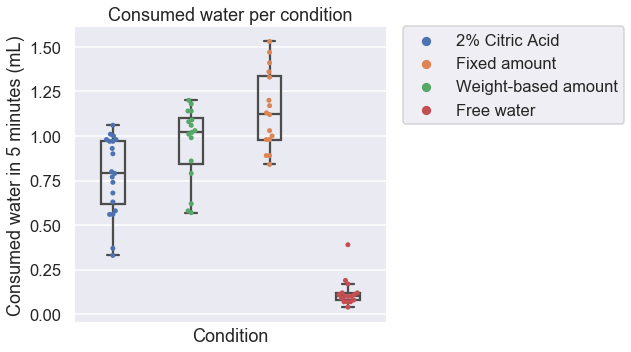

In [4]:
########### PLOTTING ########### 

f = plt.figure(figsize=(9,5))
sns.swarmplot(x="condition", y="water_amount", order=['2% Citric Acid', 'Weight-based amount','Fixed amount', 'Free water'], hue="condition", data=water)
sns.boxplot(x="condition", y="water_amount", order=['2% Citric Acid', 'Weight-based amount','Fixed amount', 'Free water'], data=water, fliersize=0, boxprops={'facecolor':'None'}, width=.3)
plt.ylabel("Consumed water in 5 minutes (mL)")         
plt.xlabel("Condition")
plt.xticks([])
plt.title("Consumed water per condition")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
f.tight_layout()
f.savefig(os.path.join(figpath, "consumed_water_thirst.pdf"))
